In [175]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Replace 'your_file.xlsx' with the path to your Excel file
file_path = 'Student-Employability-Datasets.csv'

# Read the Excel file
df = pd.read_csv(file_path)

print(f'Shape of dataframe: {df.shape}')
# Get basic information about the DataFrame
df.head()

Shape of dataframe: (2982, 10)


,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [176]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


array([[<AxesSubplot:title={'center':'Student Performance Rating'}>]],
      dtype=object)

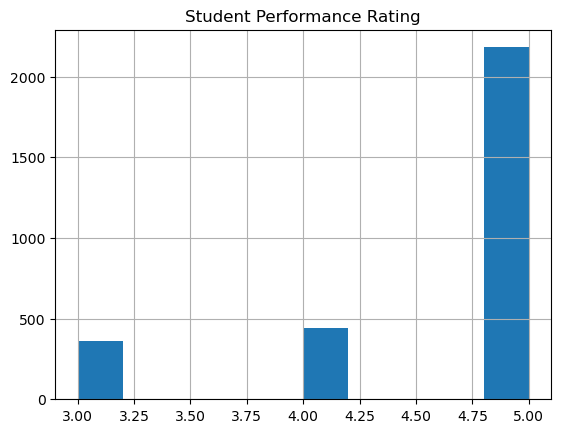

In [177]:
df.skew()["Student Performance Rating"]
df.hist(column="Student Performance Rating")

array([[<AxesSubplot:title={'center':'MANNER OF SPEAKING'}>]],
      dtype=object)

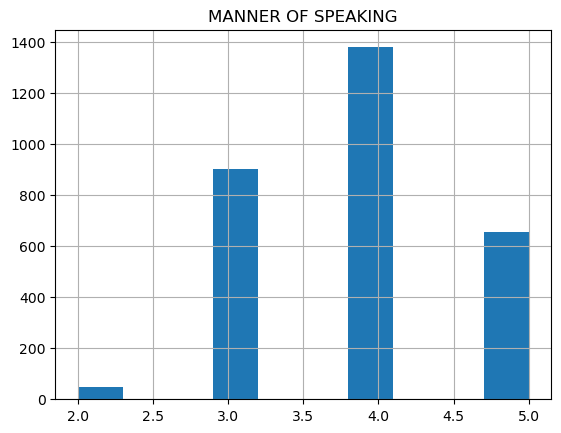

In [178]:
df.hist(column="MANNER OF SPEAKING")

In [179]:
df.nunique()

Name of Student               2982
GENERAL APPEARANCE               4
MANNER OF SPEAKING               4
PHYSICAL CONDITION               4
MENTAL ALERTNESS                 4
SELF-CONFIDENCE                  4
ABILITY TO PRESENT IDEAS         4
COMMUNICATION SKILLS             4
Student Performance Rating       3
CLASS                            2
dtype: int64

In [180]:
df.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [181]:
df['CLASS'].value_counts()

Employable        1729
LessEmployable    1253
Name: CLASS, dtype: int64

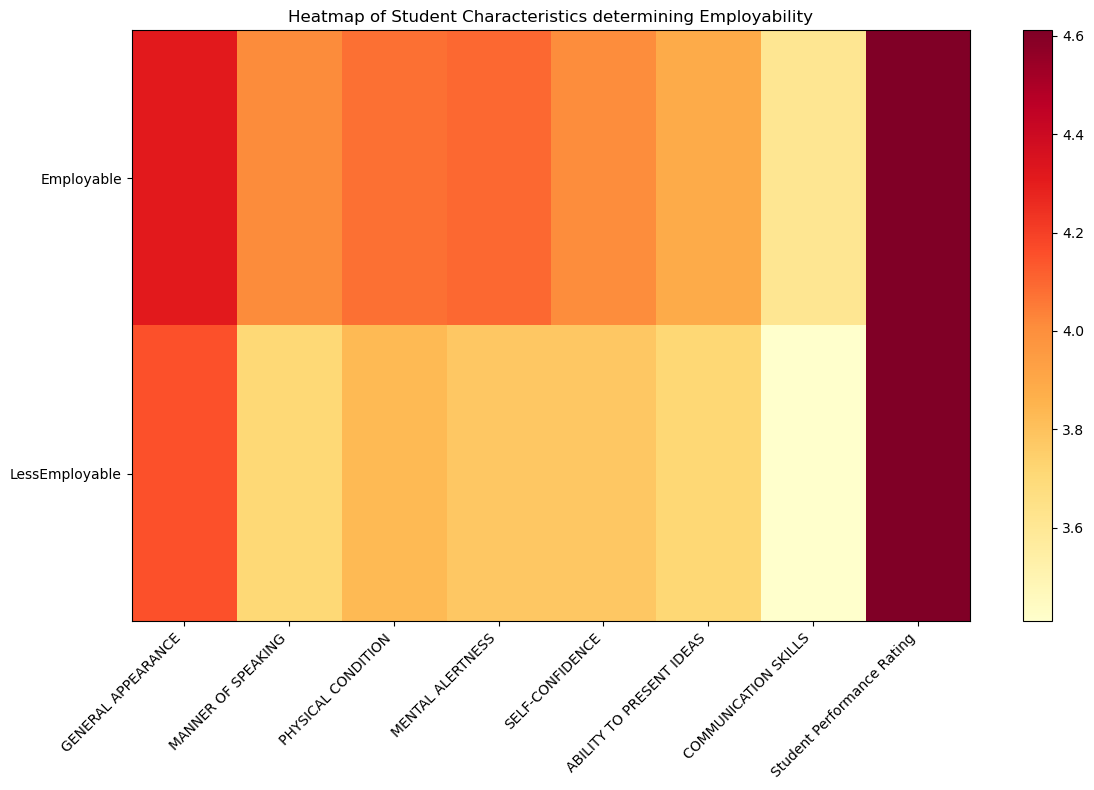

In [182]:
# Group by employability and calculate mean for each column
grouped_means = df.groupby('CLASS').mean()

# Create a heatmap to visualize the patterns
plt.figure(figsize=(12, 8))
plt.imshow(grouped_means, cmap='YlOrRd', aspect='auto')
plt.colorbar()
plt.xticks(range(len(grouped_means.columns)), grouped_means.columns, rotation=45, ha='right')
plt.yticks(range(len(grouped_means.index)), grouped_means.index)
plt.title('Heatmap of Student Characteristics determining Employability')
plt.tight_layout()
plt.show()



In [183]:
grouped_means

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
CLASS,,,,,,,,
Employable,4.314054,4.012146,4.076345,4.097744,4.008097,3.887796,3.609601,4.610179
LessEmployable,4.154030,3.708699,3.828412,3.776536,3.776536,3.711891,3.409417,4.611333


In [199]:


# 1. Correlation Analysis
# correlation_matrix = df.corr()
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
# plt.title('Correlation Heatmap of Student Characteristics')
# plt.tight_layout()
# plt.show()

# 2. Decision Tree Analysis
X = df.drop(['Name of Student', 'CLASS'], axis=1)
y = df['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# clf = DecisionTreeClassifier(random_state=42, max_depth=3)
# clf.fit(X_train, y_train)

# plt.figure(figsize=(20,10))
# plot_tree(clf, feature_names=X.columns, class_names=clf.classes_.astype(str), filled=True, rounded=True)
# plt.title('Decision Tree for Student Employability')
# plt.show()

# # Print feature importances
# importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
# importances = importances.sort_values('importance', ascending=False)
# print("Feature Importances:")
# print(importances)

# 3. Analyzing High-Performing Students with Low Average Scores
df['avg_score'] = X.mean(axis=1)
exceptional_performers = df[ (df['CLASS'] == 'Employable') & ( df['avg_score'] < df['avg_score'].median()-1 )]

print(exceptional_performers.value_counts())

if not exceptional_performers.empty:
    print("\nHigh Performers with Below-Median Average Scores:")
    for _, student in exceptional_performers.iterrows():
        print(f"\nStudent Profile:")
        for column in df.columns:
            if column != 'CLASS' and column != 'avg_score':
                print(f"{column}: {student[column]}")

# # 4. Threshold Analysis
# def find_employability_thresholds(df):
#     thresholds = {}
#     for column in df.columns:
#         if column not in ['employability', 'avg_score']:
#             threshold = df[df['employability'] == df['employability'].max()][column].min()
#             thresholds[column] = threshold
#     return thresholds

# employability_thresholds = find_employability_thresholds(df)
# print("\nMinimum Thresholds for High Employability:")
# for feature, threshold in employability_thresholds.items():
#     print(f"{feature}: {threshold}")

# # 5. Interaction Effects
# plt.figure(figsize=(15, 10))
# sns.pairplot(df, hue='employability', vars=df.columns[:5])  # Adjust the number of variables as needed
# plt.suptitle('Pairwise Relationships between Features', y=1.02)
# plt.tight_layout()
# plt.show()

Name of Student  GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  COMMUNICATION SKILLS  Student Performance Rating  CLASS       avg_score
Student 90       3                   3                   3                   3                 3                2                         2                     4                           Employable  2.875        1
Student 818      3                   3                   3                   3                 3                2                         2                     4                           Employable  2.875        1
Student 636      3                   3                   3                   3                 3                2                         2                     4                           Employable  2.875        1
Student 454      3                   3                   3                   3                 3                2                         2      

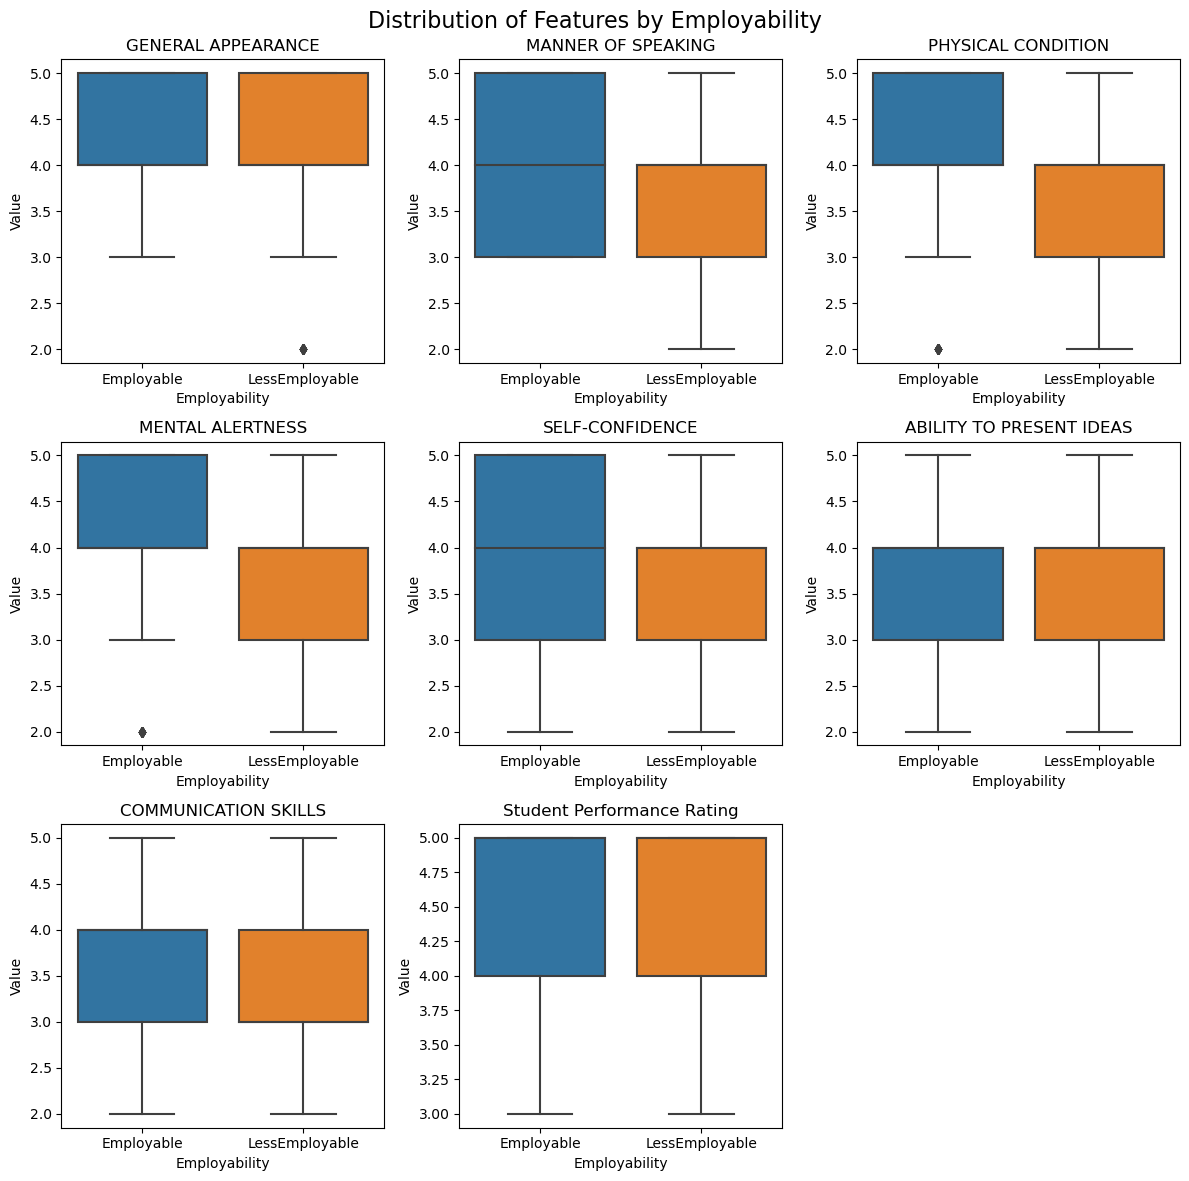

In [194]:
# Identify numeric columns (excluding 'employability')
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'CLASS']

# Calculate the number of rows and columns for the subplot grid
n_cols = 3  # You can adjust this number to change the layout
n_rows = (len(numeric_columns) - 1) // n_cols + 1

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows))
fig.suptitle('Distribution of Features by Employability', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create a boxplot for each numeric feature
for i, column in enumerate(numeric_columns):
    sns.boxplot(x='CLASS', y=column, data=df, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Employability')
    axes[i].set_ylabel('Value')

# Remove any unused subplots
for i in range(len(numeric_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [ ]:
df.loc[0:30]

In [ ]:
### CHECKING IDENTICAL FEATURES THAT LEAD TO DIFFERENT OUTPUTS

# Load the dataset
df_small_dataset = df.loc[0:30]
df_small_dataset.drop(columns='Name of Student', inplace=True)

# Function to find rows with identical feature values but different outcomes
def find_inconsistent_rows(df_small_dataset, outcome_column):
    # Identify feature columns (all columns except the outcome column)
    feature_columns = df_small_dataset.columns.drop(outcome_column).tolist()
    
    # Group by all feature columns
    grouped = df_small_dataset.groupby(feature_columns)
    print(f'CHECK: {grouped.nunique()}')
    # Filter groups where the outcome is not unique
    inconsistent = grouped.filter(lambda x: x[outcome_column].nunique() > 1)
    
    return inconsistent

# Find inconsistent rows
inconsistent_rows = find_inconsistent_rows(df_small_dataset, 'CLASS')

# Display the results
if inconsistent_rows.empty:
    print("No rows found with identical features but different outcomes.")
else:
    # print("Rows with identical features but different outcomes:")
    print(inconsistent_rows.index)
    
    # Group the inconsistent rows to show the differences more clearly
    grouped_inconsistent = inconsistent_rows.groupby(inconsistent_rows.columns.drop('CLASS').tolist())
    
    print("\nGrouped view of inconsistent rows:")
    for name, group in grouped_inconsistent:
        print("\nFeature values:", name)
        print(group.value_counts())


# Optional: Save the results to a CSV file
# inconsistent_rows.to_csv('inconsistent_rows.csv', index=False)
# print("\nInconsistent rows have been saved to 'inconsistent_rows.csv'")

# Additional analysis: Count of inconsistencies
# inconsistency_count = len(grouped_inconsistent)
# total_rows = len(df_small_dataset)
# inconsistency_percentage = (inconsistency_count / total_rows) * 100

# print(f"\nTotal number of inconsistent groups: {inconsistency_count}")
# print(f"Percentage of rows involved in inconsistencies: {inconsistency_percentage:.2f}%")

# Feature importance for inconsistent rows
# if not inconsistent_rows.empty:
#     feature_counts = inconsistent_rows.drop('CLASS', axis=1).nunique()
#     feature_importance = feature_counts.sort_values(ascending=False)
    
#     print("\nFeature variability in inconsistent rows:")
#     print(feature_importance)
    
#     print("\nThis shows how many unique values each feature has in the inconsistent rows.")
#     print("Features with more unique values might be more important in distinguishing between outcomes.")